In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import pickle
import pickle
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib import rc

# picture path
PICS = '../pics/'
name=[r'$\nu_{\mu}$', r"$\nu_e$", r"$\nu_{\tau}$"]  # ,r'$\nu_{e}$',r'$\nu_{\tau}$'
# Plotting standards
std_size = 6.  # Size of the plot
fontsize = 15.  # Fontsize in the plot

h_length=1.5  # Handle length for the legends
export_dpi = 500  # Dpi for the image export
color_pone='#7570b3'
color_ice='#e7298a'
color_combined='#33a02c'
color_thermal='#1f78b4'
color_unitary='k'
color_4='#1b9e77'
color_6='#d95f02'
color_km = '#1a9641'
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

### galactic ###

In [2]:
energy_grid = np.logspace(1,5,51) #in GeV
m_chi= 1000 #in GeV
J_allsky=2.3e23 #from Carlos

In [3]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [4]:
def dNdE_nu(m_chi, E):
    tmp = np.zeros_like(E)
    # Since we work on a grid, the delta function is the closest val
    idE = find_nearest(E, m_chi) - 1
    tmp[idE] = 2 / E[idE]
    return tmp

In [5]:
# flux=dNdE_nu(m_chi,energy_grid)
# plt.plot(energy_grid,flux)
# plt.xscale("log")

In [6]:
# def J(theta):
#     #add intepr line
#     return

In [7]:
def galactic_flux(E, m_chi, sv, J):
        """ Fetches the galactic flux
        E : Energy Grid
        m_x : Dark Matter mass
        sv : signma_nu
        k : k factor (majorana: 2 otherwise 4)
        J : J-factor
        """
        k=2
        return (1 / (4 * np.pi)) * (sv / (3 * k * m_chi**2)) * J * dNdE_nu(m_chi, E)

### extra-galactic ###

In [8]:
omega_m=0.25
omega_L=0.75
omega_r=4.75e-5
omega_dm = 0.23
h=0.67
rho_c=1.053e-5 * h**2 #GeV/cm^3
massOfSun_grid=np.logspace(-9, 17, 151)

In [9]:
def a_z(z):
    return 1 / (1+z)

In [10]:
def H_z(z):
    a=a_z(z)
    H_0= 70/3.086e19 #km/s/Mpc->
    return H_0* ((omega_m/a**3) + omega_L)**(1/2)

In [11]:
def omega_mz(z):
    a = a_z(z)
    return  (omega_m/a**3) / (omega_L + omega_m/a**3 )

In [12]:
def omega_Lz(z):
    a = a_z(z)
    return  (omega_L) / (omega_L + omega_m/a**3)

### lopez parametrization ###

In [13]:
def D_prada(z):
    a=a_z(z)
    x_values=(omega_L/omega_m)**(1/3) * a_z(z)
    D_result=[]
    if isinstance(x_values,float):
        x=x_values
        prefactor = np.sqrt(1+x**3)/x**(3/2)
        D= lambda x: x**(3/2)/(1+x**3)**(3/2)
        x_int = integrate.quad(D,0, x)
        result = (5/2)*(omega_L/omega_m)**(1/3)*prefactor* x_int[0]
        D_result.append(result)
    elif len(x_values)>= 1:
        for x in x_values:
            prefactor = np.sqrt(1+x**3)/x**(3/2)
            D= lambda x: x**(3/2)/(1+x**3)**(3/2)
            x_int = integrate.quad(D,0, x)
            result = (5/2)*(omega_L/omega_m)**(1/3)*prefactor* x_int[0]
            D_result.append(result)
    else:
        print('error!')
    return np.array(D_result)

In [14]:
def D_lopez(z):
    return (5/2)*omega_mz(z) / (omega_mz(z)**(4/7)-omega_Lz(z)+(1+omega_mz(z)/2)*(1+omega_Lz(z)/70)) /(1+z)

In [15]:
#D_lopez(1),D_prada(1)

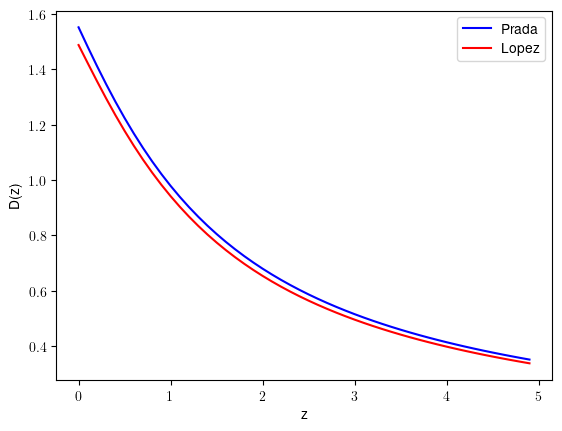

In [16]:
z_grid=np.arange(0,5,0.1)
plt.plot(z_grid,D_prada(z_grid),'b-',label="Prada")
plt.plot(z_grid,D_lopez(z_grid)*2,'r-',label="Lopez")
plt.xlabel('z')
plt.ylabel('D(z)')
plt.legend()

In [17]:
#lopez eq.B15 convert M 10^[-9,17]
def sigma_lopez(M):
    return np.exp((2.6 * M**(0.001745)) - 0.2506 * M**0.07536)

#lopez eq.B15
def ln_inv_sigma_lopez(M):
    return 2.6 * M**0.001745 - 0.2506 * M**0.07536

In [18]:
#prada eq.23, M 10^[10-15]
def sigma_prada(M):
    y = (M*h/1e12)**(-1)
    return 16.9*(y**0.41)/(1 + 1.102*(y**0.2) + 6.22*(y**0.333))

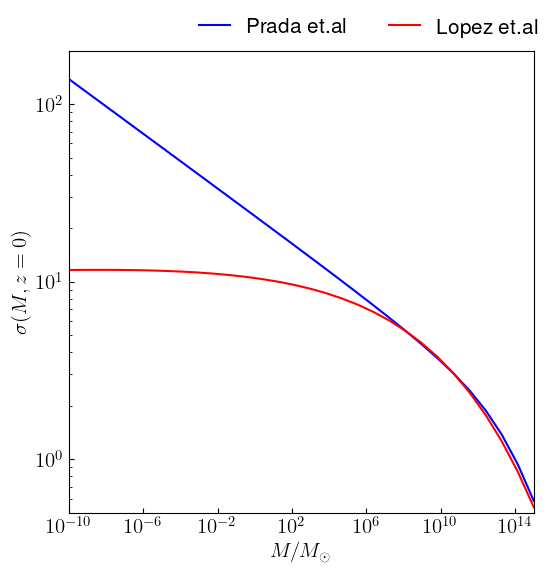

In [19]:
massOfSun_grid=np.logspace(-10, 15, 30)
figure, ax1 = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 

ax1.plot(massOfSun_grid,sigma_prada(massOfSun_grid),'b-',label="Prada et.al")
ax1.plot(massOfSun_grid,sigma_lopez(massOfSun_grid),'r-',label="Lopez et.al")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$M/M_{\odot}$', fontsize=fontsize)
ax1.set_ylabel(r'$\sigma(M,z=0)$', fontsize=fontsize)
ax1.set_xlim(1e-10,1e15)
ax1.set_ylim(0.5,2e2)

ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')

h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(1.05, +1.05),
             ncol=2, fontsize=fontsize, handlelength=h_length,
             fancybox=True, frameon=False)


figure.savefig(PICS + "sigma"+".png",
               bbox_inches='tight', dpi=export_dpi, facecolor='white')



In [20]:
#c_200 and lnsigma(z=0) comparison of lopez/prada/ibarra

In [21]:
def c_200_prada(M,z):
    return B_0(z)*C_sigma_quote_prada(M,z)

def c_200_lopez(M,z):
    return B_0(z)*C_sigma_quote_lopez(M,z)

In [22]:
def C_sigma_quote_prada(M,z):
    quote = sigma_quote_prada(M,z)
    A = 2.881
    b = 1.257
    c = 1.022
    d = 0.060
    return A * ((quote / b)**c + 1) * np.exp(d / quote**2)

def C_sigma_quote_lopez(M,z):
    quote = sigma_quote_lopez(M,z)
    A = 2.881
    b = 1.257
    c = 1.022
    d = 0.060
    return A * ((quote / b)**c + 1) * np.exp(d / quote**2)

In [23]:
def sigma_quote_lopez(M,z):
    return B_1(z)*sigma_final_lopez(M,z)

def sigma_final_lopez(M,z):
    return sigma_lopez(M)*D_lopez(z)/D_lopez(0)

In [24]:
def sigma_quote_prada(M,z):
    return B_1(z)*sigma_final_prada(M,z)

def sigma_final_prada(M,z):
    return sigma_prada(M)*D_prada(z)

In [25]:
def sigma_inv_min(x):
    sigma_inv_0 = 1.047
    sigma_inv_1 = 1.646
    beta = 7.386
    x_1 = 0.526
    return sigma_inv_0 + (sigma_inv_1 - sigma_inv_0) * ((np.arctan(beta * (x - x_1)) / np.pi) + (1/2))

def B_1(z):
    a=a_z(z)
    x=(omega_L/omega_m)**(1/3) * a_z(z)
    return sigma_inv_min(x)/sigma_inv_min(1.393)

In [26]:
def c_min(x):
    c0 = 3.681
    c1 = 5.033
    alpha = 6.948
    x_0 = 0.424
    return c0 + (c1 - c0) * ((np.arctan(alpha * (x - x_0)) / np.pi) + (1/2))

def B_0(z):
    a=a_z(z)
    x=(omega_L/omega_m)**(1/3) * a_z(z)
    return c_min(x)/c_min(1.393)

In [27]:
def ln_sigma_inv_lopez(M):
    return 0.2506 * M**(0.07536) - 2.6 * M**0.001745

In [28]:
def ln_sigma_inv_prada(M):
    return np.log((sigma_final_prada(M,z=0))**(-1))

In [29]:
#ibarra c
#conservative estimation between M_200 mas and M_vir mass
def c_ibarra(M_vir,z,M_to_Mvir=1.2):
    w =0.029
    m =0.097
    a = w*z-m
    alpha= -110.001
    beta=2469.720
    gamma=16.885
    b = alpha/(z+gamma)+beta/(z+gamma)**2
    M_200_grid = M_vir #*M_to_Mvir
    return 10**(a*np.log10(M_200_grid*h)+b)

In [30]:
#multidark c,look into table, only test z=0 case
def c_200_multidark(M,z):
    z=0
    C_0=7.40
    gamma=0.120
    M_0=5.5e12 * 1e12/ h #include mass of sun
    return C_0 *(M*h/1e12)**(-gamma)*(1+(M/M_0)**0.4)

### compare c(M,z)-M relationship ###

In [31]:
#for later vector multiplication, the two array must have same length
massOfSun_grid=np.logspace(-9, 15, 151)
z_grid=np.linspace(0,5,42)
c_prada_all = pickle.load(open('../data/tmp_files/C_para/c_All_prada_.pkl', 'rb'))
c_prada_tau = pickle.load(open('../data/tmp_files/C_para/c_\[Tau]_prada_.pkl', 'rb'))

In [32]:
c_prada_tau = c_prada_tau.T

In [33]:
c_prada_tau[2].shape

(151,)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_4938/842435815.py", line 14, in <cell line: 14>
    ax1.plot(np.log10(massOfSun_grid),np.log10(c_200_prada(massOfSun_grid,z_3_grid)),'-',label='Prada et. al analytical z=3')
  File "/tmp/ipykernel_4938/744482976.py", line 2, in c_200_prada
    return B_0(z)*C_sigma_quote_prada(M,z)
  File "/tmp/ipykernel_4938/2075404716.py", line 2, in C_sigma_quote_prada
    quote = sigma_quote_prada(M,z)
  File "/tmp/ipykernel_4938/308346936.py", line 2, in sigma_quote_prada
    return B_1(z)*sigma_final_prada(M,z)
  File "/tmp/ipykernel_4938/308346936.py", line 5, in sigma_final_prada
    return sigma_prada(M)*D_prada(z)
  File "/tmp/ipykernel_4938/64457072.py", line 3, in sigma_prada
    y = (M*h/1e12)**(-1)
ValueError: operands could not be broadcast together 

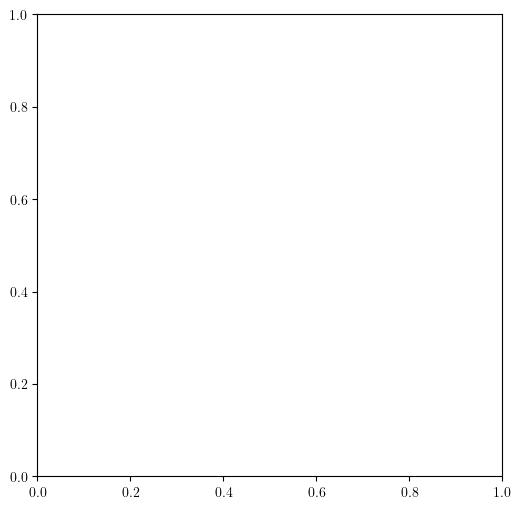

In [34]:
z_0_grid=np.linspace(0,0,151)
z_1_grid=np.linspace(1,1,151)
z_2_grid=np.linspace(2,2,151)
z_3_grid=np.linspace(3,3,151)

figure, ax1 = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
#plt.plot(ln_sigma_inv_lopez(massOfSun_grid),c_200(massOfSun_grid,z_zero_grid,sigma_quote_lopez),'b-',label='lopez')
#plt.plot(ln_sigma_inv_prada(massOfSun_grid),c_200(massOfSun_grid,z_zero_grid,sigma_quote_prada),'r-',label='prada')
#plt.plot(np.log10((sigma_prada(massOfSun_grid))**(-1)),c_200_prada(massOfSun_grid,z_0_grid),'r-',label='prada')
#plt.plot(np.log10((sigma_prada(massOfSun_grid))**(-1)),c_200_prada(massOfSun_grid,z_1_grid),'r-',label='prada')
#plt.plot(np.log10((sigma_prada(massOfSun_grid))**(-1)),c_200_prada(massOfSun_grid,z_2_grid),'r-',label='prada')
#plt.plot(np.log10((sigma_prada(massOfSun_grid))**(-1)),c_200_prada(massOfSun_grid,z_3_grid),'r-',label='prada')
#plt.plot(massOfSun_grid,ln_sigma_inv_prada(massOfSun_grid),'r-',label='prada')
ax1.plot(np.log10(massOfSun_grid),np.log10(c_200_prada(massOfSun_grid,z_3_grid)),'-',label='Prada et. al analytical z=3')
#ax1.plot(np.log10(massOfSun_grid),np.log10(c_prada_tau[2]),'-',label='prada tau z=3')
#ax1.plot(np.log10(massOfSun_grid),np.log10(c_200_prada(massOfSun_grid,z_2_grid)),'-',label='prada z=2')
#ax1.plot(np.log10(massOfSun_grid),np.log10(c_200_prada(massOfSun_grid,z_3_grid)),'-',label='Prada et. al z=3')
ax1.plot(np.log10(massOfSun_grid),np.log10(c_ibarra(massOfSun_grid,z_3_grid)),'-',label='A. Dutton et.al z=3')
ax1.plot(np.log10(massOfSun_grid),np.log10(c_200_multidark(massOfSun_grid,z_3_grid)),'-',label='Prada et.al.(multidark) z=3')
#ax1.plot(np.log10(massOfSun_grid),np.log10(c_200_lopez(massOfSun_grid,z_3_grid)),'r-',label='lopez z=3')
ax1.set_xlabel(r'$log_{10} (M_{200}/h^{-1} M_\odot)$', fontsize=fontsize)
ax1.set_ylabel(r'$log_{10}(c_{200})$', fontsize=fontsize)
ax1.set_xlim(-6,15)
#plt.ylim([0.5,1.2])

h, l = ax1.get_legend_handles_labels()

lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(1.05, +1.01),
             ncol=2, fontsize=fontsize, handlelength=h_length,
             fancybox=True, frameon=False)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')


figure.savefig(PICS + "c_"+".png",
               bbox_inches='tight', dpi=export_dpi, facecolor='white')

In [35]:
def g_tild(M,z,c_200_function):
    c_200=c_200_function(M,z)
    return ((c_200**3) * (1 - (1 + c_200)**(-3))) / (3 * (np.log(1 + c_200) - c_200 * (1 + c_200)**(-1))**2)

In [36]:
z_0_grid=np.linspace(0,0,42)
z_1_grid=np.linspace(1,1,42)
z_2_grid=np.linspace(2,2,42)
z_3_grid=np.linspace(3,3,42)
plt.plot(massOfSun_grid,g_tild(massOfSun_grid,z_0_grid,c_200_prada),'-',label='prada z=0')
plt.plot(massOfSun_grid,g_tild(massOfSun_grid,z_0_grid,c_ibarra),'-',label='ibarra z=0')
plt.plot(massOfSun_grid,g_tild(massOfSun_grid,z_0_grid,c_200_multidark),'-',label='multidark z=0')
plt.plot(massOfSun_grid,g_tild(massOfSun_grid,z_0_grid,c_200_lopez),'r-',label='lopez z=0')
plt.xlabel(r'$log_{10} (M_{200}/h^{-1} M_\odot)$')
plt.ylabel(r'$\tilde{g}(c_{200}(M,z))$')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-5,1e15])
#plt.ylim([0, 0.5e8])
plt.legend()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_4938/2298438189.py", line 5, in <cell line: 5>
    plt.plot(massOfSun_grid,g_tild(massOfSun_grid,z_0_grid,c_200_prada),'-',label='prada z=0')
  File "/tmp/ipykernel_4938/1090215601.py", line 2, in g_tild
    c_200=c_200_function(M,z)
  File "/tmp/ipykernel_4938/744482976.py", line 2, in c_200_prada
    return B_0(z)*C_sigma_quote_prada(M,z)
  File "/tmp/ipykernel_4938/2075404716.py", line 2, in C_sigma_quote_prada
    quote = sigma_quote_prada(M,z)
  File "/tmp/ipykernel_4938/308346936.py", line 2, in sigma_quote_prada
    return B_1(z)*sigma_final_prada(M,z)
  File "/tmp/ipykernel_4938/308346936.py", line 5, in sigma_final_prada
    return sigma_prada(M)*D_prada(z)
  File "/tmp/ipykernel_4938/64457072.py", line 3, in sigma_prada
    y = (M*h/1e12)

In [37]:
def f_178(sigma_function,M,z):
    sigma=sigma_function(M,z)
    A = omega_mz(z)*(1.097*(1+z)**(-3.216) + 0.074)
    alpha = omega_mz(z)*(5.907*(1+z)**(-3.599) + 2.344)
    beta = omega_mz(z)*(3.136*(1+z)**(-3.068) + 2.349)
    gamma = 1.318
    
    return A * ((sigma / beta)**(-alpha) + 1) * np.exp(-gamma / sigma**2)

In [38]:
def f_delta(sigma_function,M,z):
    delta=200
    sigma=sigma_function(M,z)
    return (np.exp(((delta / 178) - 1) * (0.023 - (0.072 / sigma**2.13))) *
            (delta / 178)**(-0.456 *omega_mz(z) - 0.139)) * f_178(sigma_function,M,z)

In [39]:
z_0_grid=np.linspace(0,0,42)
z_1_grid=np.linspace(1,1,42)
z_2_grid=np.linspace(2,2,42)
z_3_grid=np.linspace(3,3,42)
plt.plot(massOfSun_grid,f_delta(sigma_final_prada,massOfSun_grid,z_0_grid),'-',label='prada z=0')
plt.plot(massOfSun_grid,f_delta(sigma_final_lopez,massOfSun_grid,z_0_grid),'-',label='lopez z=0')
plt.xlabel(r'$log_{10} (M_{200}/h^{-1} M_\odot)$')
plt.ylabel(r'$f_{\Delta=200}(\sigma,z)$')
plt.xscale('log')
#plt.yscale('log')
plt.xlim([1e-5,1e15])
#plt.ylim([0, 0.5e8])
plt.legend()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_4938/3035147861.py", line 5, in <cell line: 5>
    plt.plot(massOfSun_grid,f_delta(sigma_final_prada,massOfSun_grid,z_0_grid),'-',label='prada z=0')
  File "/tmp/ipykernel_4938/444432515.py", line 3, in f_delta
    sigma=sigma_function(M,z)
  File "/tmp/ipykernel_4938/308346936.py", line 5, in sigma_final_prada
    return sigma_prada(M)*D_prada(z)
  File "/tmp/ipykernel_4938/64457072.py", line 3, in sigma_prada
    y = (M*h/1e12)**(-1)
ValueError: operands could not be broadcast together with shapes (151,) (2,) 

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/executing/executing.py", line 317, in executing
    args = exec

### compare $ln(\sigma^-1)$ and final integral of extragalactic flux ###

In [40]:
def dln_inv_dlogM_lopez(M):
    return 0.2506 * 0.07536 * (M)**(0.07536 - 1) - 2.6 * 0.001745 * (M)**(0.001745 - 1)

def dln_inv_dlogM_prada(M): # change the results --- 
    y = (M * h / (1e12 ))**(-1)
    dln_sigma_inv_dy = -(0.0372058*(y**1.997+10.9392*y**1.8+1.77167*y**1.797))/((y**0.003+0.17717*y**0.2+0.160772)*y**2.797)
    dy_dm = -y/M
    dln_sigma_inv_dm = dln_sigma_inv_dy * dy_dm
    return dln_sigma_inv_dm

In [41]:
M=np.logspace(-9, 15, 42)
z=np.linspace(0,20,42)
def G_lopez(z):
    delta=200
    lopez_int_grid=np.logspace(-5, 17, 151)
    def integrand(M):
        return dln_inv_dlogM_lopez(M) * f_delta(sigma_final_lopez,M,z) * g_tild(M, z,c_200_lopez)
    
    prefactor = ((omega_m/omega_dm)**2) * (delta/(3*omega_m/a_z(z)**3))
    
    to_int_values=np.array([integrand(M) for M in lopez_int_grid])
    
    int_values = np.trapz(to_int_values, x=lopez_int_grid,axis=0)
    
    return prefactor*int_values

def G_prada(z):
    delta=200
    lopez_int_grid=np.logspace(-5, 17, 151)
    def integrand(M):
        return dln_inv_dlogM_prada(M) * f_delta(sigma_final_prada,M,z) * g_tild(M, z,c_200_prada)
    prefactor = ((omega_m/omega_dm)**2) * (delta/(3*omega_m/a_z(z)**3))
    to_int_values=np.array([integrand(M) for M in lopez_int_grid])
    int_values = np.trapz(to_int_values, x=lopez_int_grid,axis=0)
    
    return prefactor*int_values

def G_ibarra(z):
    delta=200
    lopez_int_grid=np.logspace(-9, 17, 151)
    def integrand(M):
        return dln_inv_dlogM_prada(M) * f_delta(sigma_final_prada,M,z) * g_tild(M, z,c_ibarra)
    prefactor = ((omega_m/omega_dm)**2) * (delta/(3*omega_m/a_z(z)**3))
    to_int_values=np.array([integrand(M) for M in lopez_int_grid])
    int_values = np.trapz(to_int_values, x=lopez_int_grid,axis=0)
    
    return prefactor*int_values

In [42]:
G_prada(z)*(1+z)**3

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_4938/370697876.py", line 1, in <cell line: 1>
    G_prada(z)*(1+z)**3
  File "/tmp/ipykernel_4938/1061617900.py", line 23, in G_prada
    to_int_values=np.array([integrand(M) for M in lopez_int_grid])
  File "/tmp/ipykernel_4938/1061617900.py", line 23, in <listcomp>
    to_int_values=np.array([integrand(M) for M in lopez_int_grid])
  File "/tmp/ipykernel_4938/1061617900.py", line 21, in integrand
    return dln_inv_dlogM_prada(M) * f_delta(sigma_final_prada,M,z) * g_tild(M, z,c_200_prada)
  File "/tmp/ipykernel_4938/1012555996.py", line 5, in dln_inv_dlogM_prada
    y = (M * h / (1e12 ))**(-1)
TypeError: can't multiply sequence by non-int of type 'numpy.float64'

During handling of the above exception, another exception occurred:

Traceback (most 

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_4938/1095731344.py", line 3, in <cell line: 3>
    ax1.plot((1+z),G_prada(z)*(1+z)**3,label='Simulation')
  File "/tmp/ipykernel_4938/1061617900.py", line 23, in G_prada
    to_int_values=np.array([integrand(M) for M in lopez_int_grid])
  File "/tmp/ipykernel_4938/1061617900.py", line 23, in <listcomp>
    to_int_values=np.array([integrand(M) for M in lopez_int_grid])
  File "/tmp/ipykernel_4938/1061617900.py", line 21, in integrand
    return dln_inv_dlogM_prada(M) * f_delta(sigma_final_prada,M,z) * g_tild(M, z,c_200_prada)
  File "/tmp/ipykernel_4938/1012555996.py", line 5, in dln_inv_dlogM_prada
    y = (M * h / (1e12 ))**(-1)
TypeError: can't multiply sequence by non-int of type 'numpy.float64'

During handling of the above exception, another e

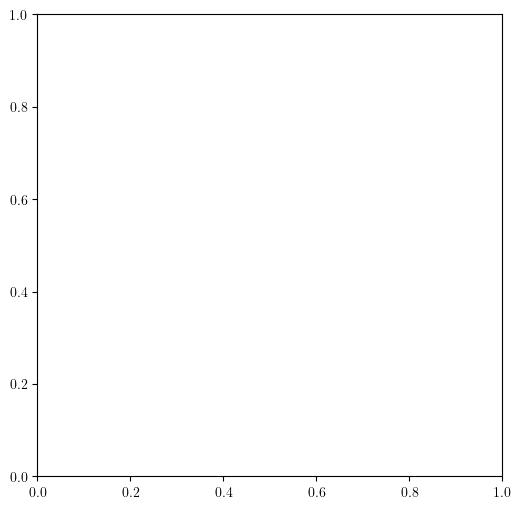

In [43]:
figure, ax1 = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
#ax1.plot((1+z),G_lopez(z)*(1+z)**3,label='Simulation')
ax1.plot((1+z),G_prada(z)*(1+z)**3,label='Simulation')
ax1.plot((1+z),G_ibarra(z)*(1+z)**3, '-.',label='A. Moline et.al. ')
ax1.set_xlabel(r'$(1+z)$', fontsize=fontsize)
ax1.set_ylabel(r'$(1+z)^3 \times G(z)$', fontsize=fontsize)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(0, 20)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(1.05, +1.01),
             ncol=2, fontsize=fontsize, handlelength=h_length,
             fancybox=True, frameon=False)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')


figure.savefig(PICS + "G_"+".png",
               bbox_inches='tight', dpi=export_dpi, facecolor='white')

In [44]:
def dPhidE_extra(E, m_x, sv, G_function):
    z = m_x / E - 1  # To apply the delta function integral
    z_tmp = z[z > 0]

    Cosmos = (1 + G_function(z_tmp)) *(1 + z_tmp**3)/H_z(z_tmp)
    Physics = sv * (omega_dm * rho_c) ** 2
    factor = 8 * np.pi * m_x**2
    
    res = 2* Cosmos * Physics / (3 * E[E<m_x] *factor)
    
    result = np.zeros_like(E)
    result[0:len(res)] = res
    
    return result
#try different method

In [45]:
def dPhidE_extra_test(E, m_x, sv, G_function):
    z = m_x / E - 1  # To apply the delta function integral
    E_1= E*(1+z)
    z_tmp = z[z > 0]

    Cosmos = ((1+G_function(z_tmp)) * (1+z_tmp)**3)/H_z(z_tmp)
    Physics = sv * (rho_c*omega_m)**2 / (2 * m_x**2)
    
    res= 2 * 4* np.pi * Cosmos*Physics/ (E_1[E<m_x])
    
    result = np.zeros_like(E)
    result[0:len(res)] = res
    
    return result
#try different method

/tmp/ipykernel_4938/1090215601.py:3: RuntimeWarning: overflow encountered in power
  return ((c_200**3) * (1 - (1 + c_200)**(-3))) / (3 * (np.log(1 + c_200) - c_200 * (1 + c_200)**(-1))**2)
/tmp/ipykernel_4938/1061617900.py:7: RuntimeWarning: invalid value encountered in multiply
  return dln_inv_dlogM_lopez(M) * f_delta(sigma_final_lopez,M,z) * g_tild(M, z,c_200_lopez)
/tmp/ipykernel_4938/2075404716.py:15: RuntimeWarning: overflow encountered in exp
  return A * ((quote / b)**c + 1) * np.exp(d / quote**2)
/tmp/ipykernel_4938/1090215601.py:3: RuntimeWarning: invalid value encountered in multiply
  return ((c_200**3) * (1 - (1 + c_200)**(-3))) / (3 * (np.log(1 + c_200) - c_200 * (1 + c_200)**(-1))**2)
Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_4938/3290927614.py", line 6, in <cell line: 6>
 

Unexpected exception formatting exception. Falling back to standard exception


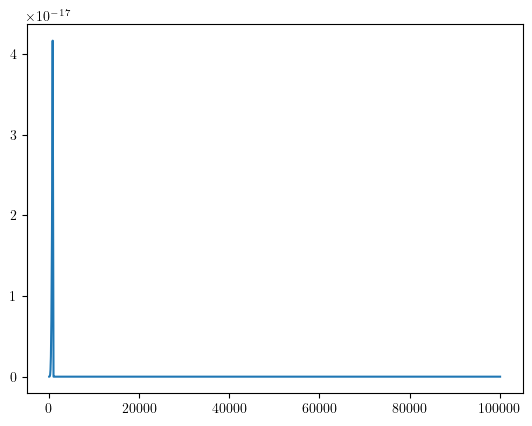

In [46]:
sv=1e-25
m_x=1000
E_log_grid=np.logspace(1, 5, 50)

plt.plot(E_log_grid,dPhidE_extra_test(E_log_grid,m_x,sv,G_lopez)*(E_log_grid**2),label='lopez extra')
plt.plot(E_log_grid,dPhidE_extra_test(E_log_grid,m_x,sv,G_prada)*(E_log_grid**2),label='prada extra')
plt.plot(E_log_grid,dPhidE_extra_test(E_log_grid,m_x,sv,G_ibarra)*(E_log_grid**2),label='ibarra extra')
plt.xlabel('$E[GeV]$')
plt.ylabel(r'$E^2 d\Phi/dE [GeV cm^{-2} s^{-1}]$')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e2,1e4])
plt.ylim([1e-20, 1e-8])
plt.legend()

### compare galactic and extragalactic contribution ###

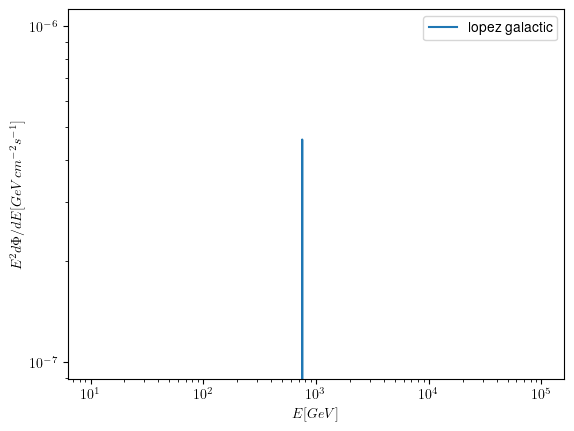

In [47]:
sv=1e-25
m_x=1000
E_log_grid=np.logspace(1, 5, 50)

plt.plot(E_log_grid,galactic_flux(E_log_grid,m_x,sv,J_allsky)*(E_log_grid**2),label='lopez galactic')
plt.xlabel('$E[GeV]$')
plt.ylabel(r'$E^2 d\Phi/dE [GeV cm^{-2} s^{-1}]$')
plt.xscale('log')
plt.yscale('log')
#plt.xlim([1e-5,1e15])
#plt.ylim([0, 0.5e8])
plt.legend()